In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# 1.KNN

In [114]:
df = pd.read_csv('Network_Ads.csv')
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000.0,0
1,Male,35,20000.0,0
2,Female,26,43000.0,0
3,Female,27,57000.0,0
4,Male,19,76000.0,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    int64  
 2   EstimatedSalary  389 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [116]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000.0,0
1,Male,35,20000.0,0
2,Female,26,43000.0,0
3,Female,27,57000.0,0
4,Male,19,76000.0,0


In [117]:
df_with_gender = df.copy()

In [118]:
df_with_gender[['Gender']] = LabelEncoder().fit_transform(df['Gender'].values)

In [119]:
df_with_gender

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000.0,0
1,1,35,20000.0,0
2,0,26,43000.0,0
3,0,27,57000.0,0
4,1,19,76000.0,0
...,...,...,...,...
384,0,46,41000.0,1
385,1,51,23000.0,1
386,0,50,20000.0,1
387,1,36,33000.0,0


In [120]:
df_without_gender = df.drop('Gender', axis=1)

In [121]:
df_without_gender

,Age,EstimatedSalary,Purchased
0,19,19000.0,0
1,35,20000.0,0
2,26,43000.0,0
3,27,57000.0,0
4,19,76000.0,0
...,...,...,...
384,46,41000.0,1
385,51,23000.0,1
386,50,20000.0,1
387,36,33000.0,0


# 1.1. With gender

In [150]:
df_with_gender[['Age',	'EstimatedSalary']] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_with_gender[['Age',	'EstimatedSalary']].values)

In [151]:
df_with_gender

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0
...,...,...,...,...
384,0,0.666667,0.192593,1
385,1,0.785714,0.059259,1
386,0,0.761905,0.037037,1
387,1,0.428571,0.133333,0


In [152]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_with_gender.iloc[:, :-1], df_with_gender.iloc[:, -1], test_size=0.25, random_state=42)

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
Ks=20
his_acc1 = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y1_train)
    y1_hat=neigh.predict(X1_test)
    his_acc1[n-1] = metrics.accuracy_score(y1_test, y1_hat)

his_acc1

array([0.82653061, 0.83673469, 0.89795918, 0.89795918, 0.90816327,
       0.89795918, 0.89795918, 0.89795918, 0.90816327, 0.90816327,
       0.91836735, 0.91836735, 0.90816327, 0.91836735, 0.91836735,
       0.91836735, 0.91836735, 0.90816327, 0.90816327])

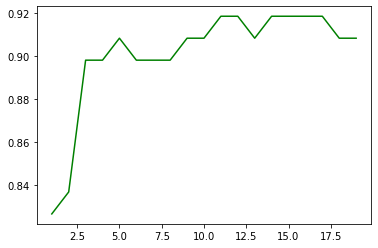

In [180]:
plt.plot(range(1,Ks),his_acc1,'g')

In [156]:
print( "The best accuracy was with", his_acc1.max(), "with k=", his_acc1.argmax()+1) 

The best accuracy was with 0.9183673469387755 with k= 11


# 1.2. Without gender

In [163]:
df_without_gender[['Age','EstimatedSalary']] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_without_gender[['Age',	'EstimatedSalary']].values)

In [164]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df_without_gender.iloc[:, :-1], df_without_gender.iloc[:, -1], test_size=0.25, random_state=42)

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
Ks = 20
his_acc2 = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train)
    y2_hat=neigh.predict(X2_test)
    his_acc2[n-1] = metrics.accuracy_score(y2_test, y2_hat)

his_acc2

array([0.89795918, 0.86734694, 0.91836735, 0.90816327, 0.89795918,
       0.89795918, 0.8877551 , 0.87755102, 0.8877551 , 0.89795918,
       0.89795918, 0.89795918, 0.89795918, 0.89795918, 0.89795918,
       0.89795918, 0.89795918, 0.90816327, 0.90816327])

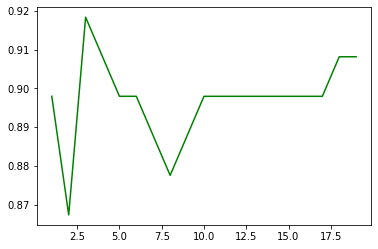

In [182]:
plt.plot(range(1,Ks),his_acc2,'g')

In [172]:
his_acc2

array([0.89795918, 0.86734694, 0.91836735, 0.90816327, 0.89795918,
       0.89795918, 0.8877551 , 0.87755102, 0.8877551 , 0.89795918,
       0.89795918, 0.89795918, 0.89795918, 0.89795918, 0.89795918,
       0.89795918, 0.89795918, 0.90816327, 0.90816327])

In [162]:
print( "The best accuracy was with", his_acc2.max(), "with k=", his_acc2.argmax()+1)

The best accuracy was with 0.9183673469387755 with k= 3


# 1.3. Result

Kết luận vậy với mô hình có thuộc tính Gender (giới tính) cho độ chính xác cao tương đương với K ít hơn so với mô hình không có Gender

=> Ta nên xoá cột gender để tiết kiệm bộ nhớ và thời gian xử lý của bài toán mà vẫn giữ được độ chính xác cao

Vậy độ chính xác tốt nhất là 91.83% với k= 3

# 2. SVM

In [184]:
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
iris = datasets.load_iris(as_frame=True)

In [86]:
X = iris.data

In [87]:
y = iris.target

In [84]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [92]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [89]:
y.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [169]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train) 

SVC()

In [170]:
yhat = svm_model.predict(X_test)

In [194]:
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print('Confusion matrix:', cnf_matrix, sep='\n')
print (classification_report(y_test, yhat))

Confusion matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Kết luận: SVM cho độ chính xác rất cao là 100% =.= quá chất :))